In [6]:
from sklearn.datasets import load_boston

In [7]:
data = load_boston()

In [5]:
len(x[:,5])

506

In [55]:
len(y)

506

In [19]:
x[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [15]:
y[0]

24.0

In [4]:
x, y = data['data'], data['target']

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

In [30]:
def draw_rm_and_price():
    plt.scatter(x[:, 5], y)

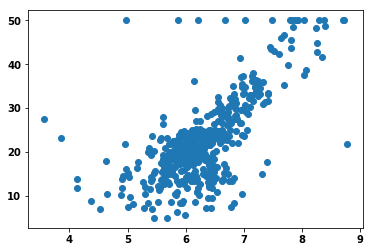

In [31]:
draw_rm_and_price()

In [34]:
import random 

In [35]:
def price(rm, k, b):
    return k * rm + b

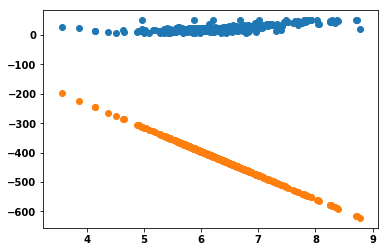

In [52]:
x_rm = x[:, 5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
draw_rm_and_price()
price_by_random_k_and_b = [price(r, k, b) for r in x_rm]
plt.scatter(x_rm, price_by_random_k_and_b)

In [54]:
def loss(y, y_hat):
    return sum((y_i - y_hat_i) ** 2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

############# Method 1: Random k and b ###############################

In [125]:
trying_times = 2000
min_loss = float('inf')
best_k, best_b = None, None

for i in range(trying_times):
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    price_by_random_k_and_b = [price(r, k, b) for r in x_rm]

    current_loss = loss(y, price_by_random_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

When time is : 0, get best_k: 91.63354282374499 best_b: -49.314059626467134, and the loss is: 257452.30448791257
When time is : 2, get best_k: 55.01001903412387 best_b: 29.74062640501728, and the loss is: 125638.50729211852
When time is : 3, get best_k: 19.672603303690337 best_b: -53.07746108962388, and the loss is: 2405.038414457395
When time is : 44, get best_k: -1.7549555610767698 best_b: 50.838159278652, and the loss is: 400.1410121549869
When time is : 81, get best_k: 7.155159543755602 best_b: -18.649264117270548, and the loss is: 59.798112412652685
When time is : 1177, get best_k: 5.363848714311544 best_b: -10.002823366656116, and the loss is: 51.864507178053685
When time is : 1969, get best_k: 9.765895812689337 best_b: -39.98942026597388, and the loss is: 45.133574303512624


In [123]:
random.random()

0.9318193537804461


########################### Method 2: Direction Adjusting #########################################


In [159]:
directions = [
    (+1, +1),
    (+1, -1),
    (-1, +1),
    (-1, -1),
]
trying_times2 = 1000
best_value = float('inf')
best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100
next_direction = random.choice(directions)
scalar = 0.1

for i in range(trying_times2):
    k_direction, b_direction = next_direction
    current_k = best_k + k_direction * scalar
    current_b = best_b + b_direction * scalar
    x_rm = x[:, 5]
    y_k_and_b = loss(y, [price(rm, current_k, current_b) for rm in x_rm])
    
    if y_k_and_b < best_value:
        best_value = y_k_and_b
        best_k, best_b = current_k, current_b
        if i % 10 == 0:
            print('when time is {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, best_value))
    else:
        next_direction = random.choice(directions)

when time is 0, get best_k: -58.13299810969884 best_b: -32.97514915806378, and the loss is: 179387.76490226283
when time is 10, get best_k: -57.33299810969883 best_b: -33.77514915806379, and the loss is: 175794.46812484603
when time is 20, get best_k: -56.33299810969881 best_b: -34.775149158063805, and the loss is: 171354.00325355754
when time is 30, get best_k: -55.3329981096988 best_b: -35.77514915806382, and the loss is: 166970.3784939178
when time is 40, get best_k: -54.332998109698785 best_b: -36.77514915806383, and the loss is: 162643.59384592608
when time is 50, get best_k: -53.33299810969877 best_b: -37.77514915806385, and the loss is: 158373.64930958298
when time is 60, get best_k: -52.33299810969876 best_b: -38.77514915806386, and the loss is: 154160.54488488773
when time is 70, get best_k: -51.33299810969874 best_b: -39.775149158063876, and the loss is: 150004.2805718408
when time is 80, get best_k: -50.33299810969873 best_b: -40.77514915806389, and the loss is: 145904.85637

In [149]:
random.random()

0.4274786077426411


####################################################


In [12]:
from sklearn.datasets import load_boston
import random

data = load_boston()
x, y = data['data'], data['target']
x_rm = x[:, 5]

trying_times = 2000
learning_rate = 0.01
min_loss = float('inf')
current_k = random.random() - 200 + 100
current_b = random.random() - 200 + 100

for i in range(trying_times):
    y_hat = [price(rm, current_k, current_b) for rm in x_rm]
#     current_loss = loss(y, y_hat)
    current_loss = loss_one_order(y, y_hat)
    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        
        if i % 50 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, current_k, current_b, min_loss))
    current_k -= partial_k_one_order(x_rm, y, y_hat) * learning_rate
    current_b -= partial_b_one_order(x_rm, y, y_hat) * learning_rate
#     current_k -= partial_k(x_rm, y, y_hat) * learning_rate
#     current_b -= partial_b(x_rm, y, y_hat) * learning_rate

When time is : 0, get best_k: -99.04123482834095 best_b: -99.19545650280594, and the loss is: 744.1662129948902
When time is : 50, get best_k: -95.89891763466511 best_b: -98.69545650280568, and the loss is: 723.9178983035488
When time is : 100, get best_k: -92.75660044098927 best_b: -98.19545650280543, and the loss is: 703.6695836122068
When time is : 150, get best_k: -89.61428324731344 best_b: -97.69545650280517, and the loss is: 683.4212689208657
When time is : 200, get best_k: -86.4719660536376 best_b: -97.19545650280492, and the loss is: 663.172954229522
When time is : 250, get best_k: -83.32964885996176 best_b: -96.69545650280466, and the loss is: 642.9246395381801
When time is : 300, get best_k: -80.18733166628593 best_b: -96.1954565028044, and the loss is: 622.6763248468384
When time is : 350, get best_k: -77.04501447261009 best_b: -95.69545650280415, and the loss is: 602.4280101554954
When time is : 400, get best_k: -73.90269727893426 best_b: -95.19545650280389, and the loss is

In [8]:
def price(rm, k, b):
    return k * rm + b

def loss(y, y_hat):
    return sum([(y_i - y_hat_i) ** 2 for y_i, y_hat_i in zip(y, y_hat)])/len(y)

def loss_one_order(y, y_hat):
    return sum([abs(y_i - y_hat_i) for y_i, y_hat_i in zip(y, y_hat)])/len(y)

def partial_k(x, y, y_hat):
    return -2 * sum([(y_i - y_hat_i) * x_i for (y_i, y_hat_i, x_i) in zip(y, y_hat, x)]) / len(y)

def partial_b(x, y, y_hat):
    return -2 * sum([(y_i - y_hat_i) for (y_i, y_hat_i) in zip(y, y_hat)]) / len(y)

def partial_k_one_order(x, y, y_hat):
    n = len(y)
    gradient = 0
    for (x_i, y_i, y_hat_i) in zip(x, y, y_hat):
        if y_i > y_hat_i:
            gradient -= x_i
        else:
            gradient += x_i
    return gradient / n

def partial_b_one_order(x, y, y_hat):
    n = len(y)
    gradient = 0
    for (y_i, y_hat_i) in zip(y, y_hat):
        if y_i > y_hat_i:
            gradient -= 1
        else:
            gradient += 1
    return gradient / n

# def partial_k(x, y, y_hat):
#     n = len(y)

#     gradient = 0
    
#     for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
#         gradient += (y_i - y_hat_i) * x_i
    
#     return -2 / n * gradient


# def partial_b(x, y, y_hat):
#     n = len(y)

#     gradient = 0
    
#     for y_i, y_hat_i in zip(list(y), list(y_hat)):
#         gradient += (y_i - y_hat_i)
    
#     return -2 / n * gradient

In [1]:
test_x = [1,2]
test_y = [3, 4]
for i in zip(test_x, test_y):
    print(i)
    print(i[0])

(1, 3)
1
(2, 4)
2


$$ \frac{\partial{loss}}{\partial{k}}= \frac{2}{n}(k_i*x_i  + b_i)x_i $$

In [4]:
abs(-2.5)

2.5